In [69]:
import pandas as pd
import plotly.express as px

from common.storage import load_cleansed_df
from common.entity import SITEMAP

In [70]:
cleansed_df = load_cleansed_df(SITEMAP, ['ingestion_date', 'job_id'])
cleansed_df

,ingestion_date,job_id
0,2021-10-09,7506917
1,2021-10-09,7506673
2,2021-10-09,7466965
3,2021-10-09,7305531
4,2021-10-09,7384538
...,...,...
19367884,2022-03-18,8100117
19367885,2022-03-18,8101063
19367886,2022-03-18,8100311
19367887,2022-03-18,8104312


In [71]:
df = cleansed_df.copy()
df = df['ingestion_date'].value_counts()
df = df.reset_index()
df.columns = ['Date', 'Jobs']
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Jobs
132,2021-10-09,113858
151,2021-10-10,111325
149,2021-10-11,111745
128,2021-10-12,114141
102,2021-10-13,116319
...,...,...
29,2022-03-14,129285
23,2022-03-15,131363
10,2022-03-16,133802
14,2022-03-17,133619


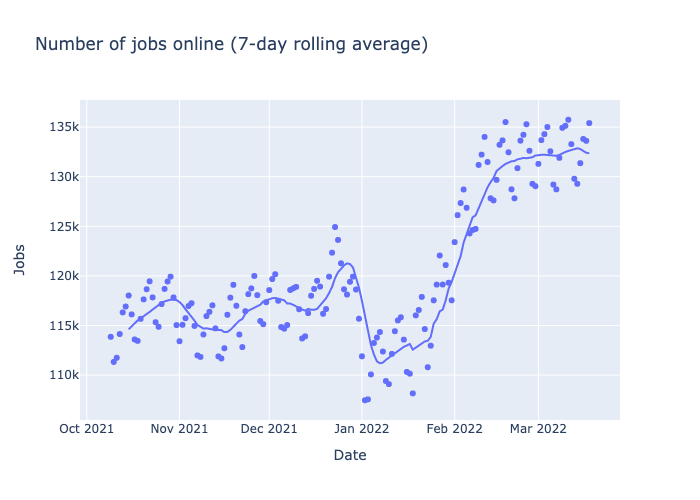

In [72]:
fig = px.scatter(df, x="Date", y="Jobs", trendline="rolling", trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show("png")

In [75]:
df = cleansed_df.copy()
df = df[df['ingestion_date'] != df['ingestion_date'].min()]
df = df[df['ingestion_date'] != df['ingestion_date'].max()]
df = df['job_id'].value_counts()
df = df.reset_index()
df.columns = ['job_id', 'Duration']
df

,job_id,Duration
0,7309811,159
1,7078646,159
2,7079183,159
3,1366060,159
4,7541202,159
...,...,...
527324,7516648,1
527325,7516049,1
527326,7514182,1
527327,7514593,1


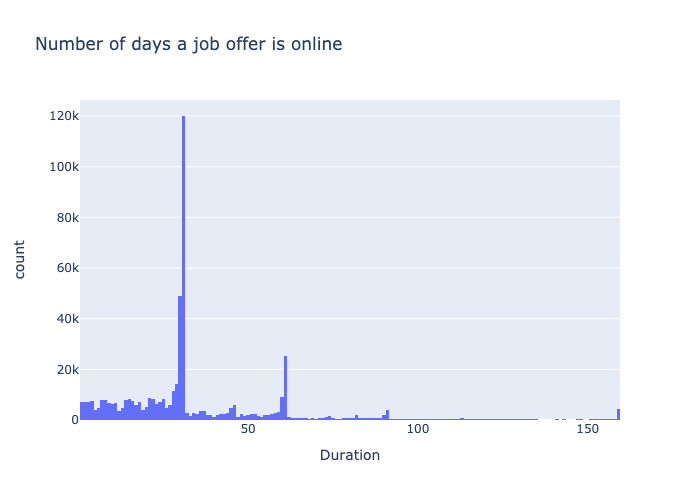

In [76]:

fig = px.histogram(df, x="Duration", title='Number of days a job offer is online')
fig.show("png")